In [20]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [48]:
# plot decsion regions
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 'x', 's', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() +1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx2.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=[colors[idx]], marker=markers[idx], label=cl)



In [4]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [6]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=0)

## Step 1: Standardize

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

X_train_std.shape

(124, 13)

## Step 2: Covariance Matrix

In [19]:
cov = np.cov(X_train_std.T)
cov.shape

(13, 13)

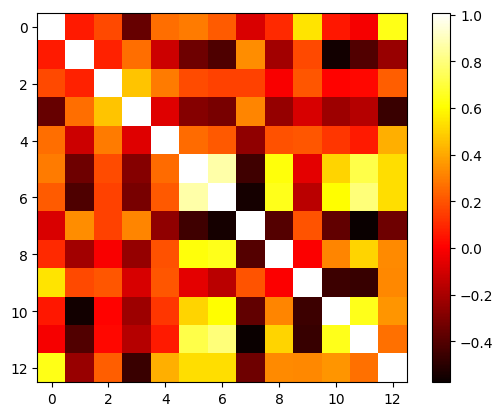

In [23]:
plt.imshow(cov, cmap='hot')
plt.colorbar()
plt.show()

## 3. Step: Decompose into Eigenvectors and Eigenvalues

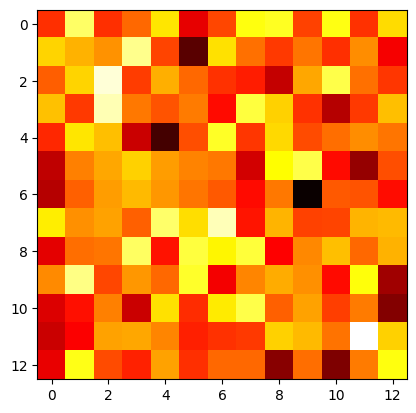

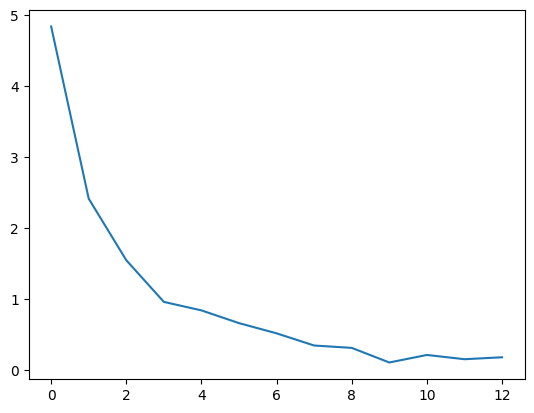

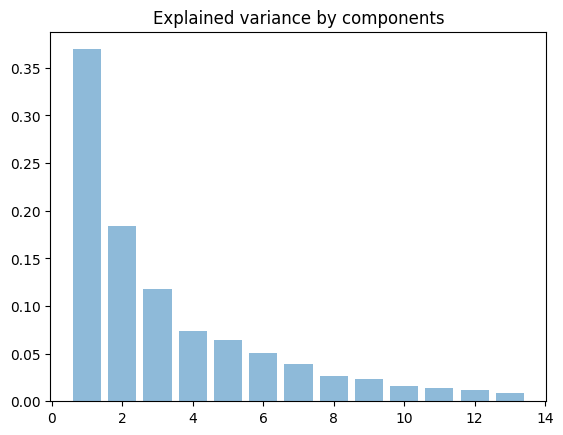

In [42]:
eig_values, eig_vectors = np.linalg.eig(cov)
total = sum(eig_values)
explained_variances = [(i / total) for i in sorted(eig_values, reverse=True)]
plt.imshow(eig_vectors, cmap='hot')
plt.show()
plt.plot(eig_values)
plt.show()
plt.bar(range(1, 14), explained_variances, alpha=.5, align='center')
plt.title('Explained variance by components')
plt.show()

## Step 4: Sort Eigenvalues and Eigenvectors

In [33]:
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

## Step 5+6: Select top k eigenvectors & construct projection matrix

In [35]:
W = np.hstack((eig_pairs[0][1][:, np.newaxis], eig_pairs[1][1][:, np.newaxis]))
W.shape

(13, 2)

## Step 7: Transform data using projection matrix

In [52]:
X_train_pca_own = X_train_std.dot(W)
X_train_pca_own.shape

(124, 2)

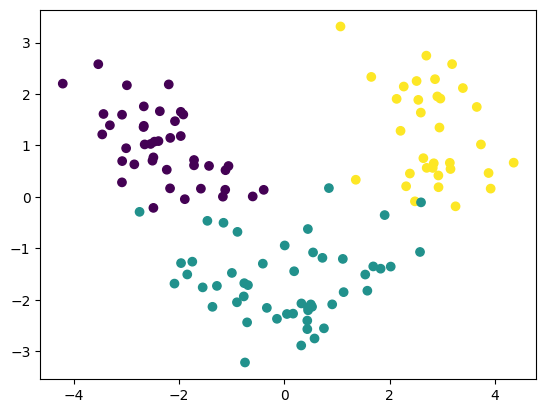

In [53]:
plt.scatter(X_train_pca_own[:, 0], X_train_pca_own[:, 1], c=y_train)
plt.show()

# Now easier in scikit-learn

In [63]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [65]:
pca = PCA(n_components=5)
lr = LogisticRegression()
lr2 = LogisticRegression()

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)
lr2.fit(X_train_std, y_train)
print(lr.score(X_test_pca, y_test))
print(lr2.score(X_test_std, y_test))

0.9444444444444444
1.0


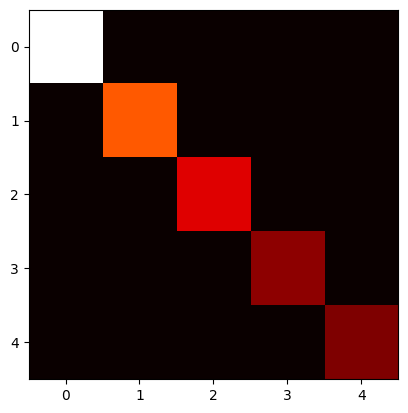

In [67]:
cov = np.cov(X_train_pca.T)
plt.imshow(cov, cmap='hot')
plt.show()

<BarContainer object of 13 artists>

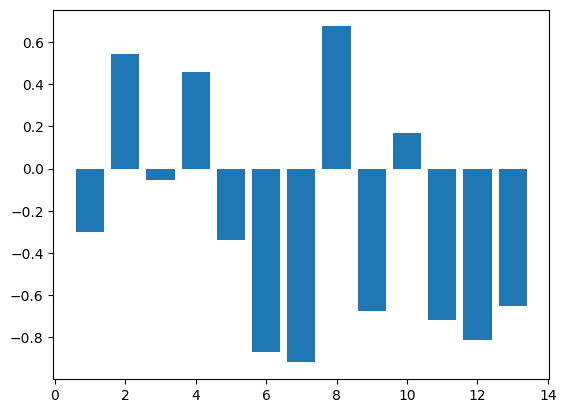

In [71]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.bar(range(1, 14), loadings[:, 0])

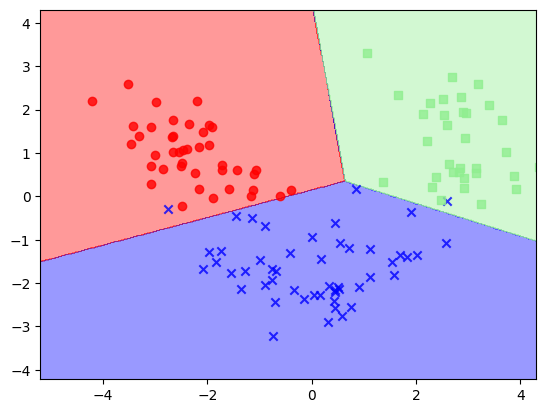

In [61]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.show()